tensor([[[[159., 152., 144.,  ..., 148., 158., 155.],
          [148., 158., 155.,  ..., 155., 148., 158.],
          [155., 148., 159.,  ..., 159., 152., 144.],
          ...,
          [167., 151., 206.,  ..., 160., 153., 147.],
          [156., 155., 151.,  ...,  25., 100.,  65.],
          [ 45., 123.,  87.,  ..., 158., 145., 196.]],

         [[169., 152., 196.,  ..., 159., 152., 146.],
          [155., 154., 150.,  ...,  37., 123.,  81.],
          [ 59., 153., 108.,  ..., 155., 141., 171.],
          ...,
          [ 99., 152., 113.,  ..., 145., 134., 157.],
          [148., 141., 154.,  ..., 149., 148., 144.],
          [151., 150., 148.,  ...,  57., 146., 112.]],

         [[ 87., 156., 115.,  ..., 145., 136., 154.],
          [149., 143., 151.,  ..., 149., 148., 144.],
          [151., 150., 148.,  ...,  62., 152., 116.],
          ...,
          [ 27.,  28.,  49.,  ...,  80.,  42.,  48.],
          [ 82.,  42.,  48.,  ...,  55.,  88.,  52.],
          [ 55.,  88.,  52.,  ...

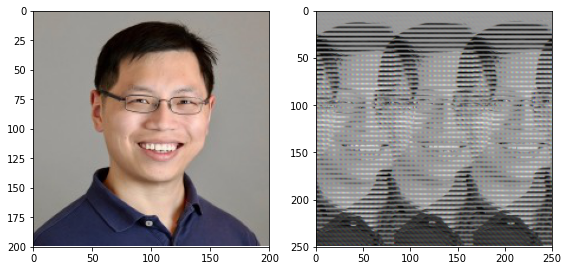

In [2]:
import torch.nn.functional as F
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


i = np.array(Image.open("test.jpg"))
inputv = i.reshape(1, 3,200, 200)
inputv = torch.FloatTensor(inputv)
print(inputv)

# 生成grid，这个grid大小为(1,8,8,2)，空间尺寸而言是原输入图片的两倍。
d = torch.linspace(-1, 1, 250)
meshx, meshy = torch.meshgrid((d, d))
grid = torch.stack((meshy, meshx), 2)
grid = grid.unsqueeze(0)  # add batch dim

# 进行双线性采样，其中指定align_corners=True保证了输出的整个图片的角边像素与原输入的一致性。
o = F.grid_sample(inputv, grid, align_corners=True)
print(o)
print(o.shape)
image = o[0].reshape(250, 250, 3).numpy()
image = image.clip(0, 255).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(8, 10))
axes = axes.flatten()
axes[0].imshow(i)
axes[1].imshow(image)
axes[0].axis([0, i.shape[1], i.shape[0], 0])
axes[1].axis([0, image.shape[1], image.shape[0], 0])
fig.tight_layout()
plt.show()